In [23]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy import integrate

Load Calibration Files in from .txt 

In [91]:
l = {os.path.basename(f): pd.read_csv(f,delim_whitespace=True, header=0) for f in glob.glob('//media/sf_Ubuntu/share/FIGAEROCALS/MULTICOMPONENT/BEHENICACID/*.txt')}
df = pd.concat(l, axis=1,ignore_index = 0)
df.columns = df.columns.droplevel(-1)
#df = df[df['Current_Step_Type.txt']!=0]
df = df [:2300]
df.describe()

,BG.txt,CONC1.txt,CONC1TEMP.txt,CONC2.txt,CONC2TEMP.txt,CONC3.txt,CONC3TEMP.txt
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,7.682281,85.132889,172.015392,21.263940,171.759304,13.161785,173.243348
std,3.132966,173.829045,43.213350,44.880189,42.769119,7.616504,40.301417
min,0.124901,0.018972,24.400000,0.104335,25.200001,0.017093,24.600000
25%,5.676440,20.089618,158.950000,9.523076,158.000000,9.489885,161.175003
50%,7.728166,31.436876,195.300000,12.378267,194.500000,12.556047,193.800000
75%,9.796446,55.901902,198.600010,15.527278,198.100010,15.586768,197.700000
max,20.529322,1042.857500,200.300000,351.302090,200.300000,59.756287,199.700000


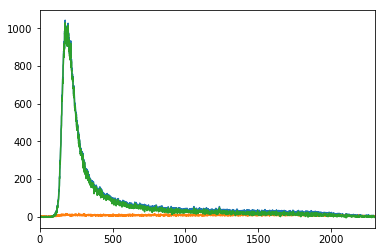

,BG.txt,CONC1.txt,CONC1TEMP.txt,CONC2.txt,CONC2TEMP.txt,CONC3.txt,CONC3TEMP.txt,CONC1BGCORRECTED,CONC2BGCORRECTED,CONC3BGCORRECTED
0,0.222998,0.126820,24.500000,2.229191,25.200001,0.318955,24.600000,-0.096178,2.006193,0.095957
1,2.066124,3.276926,24.400000,0.332056,25.200001,2.213334,24.600000,1.210802,-1.734068,0.147210
2,1.331955,0.719180,24.400000,1.913243,25.299999,0.305332,24.700001,-0.612775,0.581288,-1.026623
3,2.411712,0.250300,24.600000,1.735379,25.299999,1.092681,24.700001,-2.161412,-0.676333,-1.319031
4,1.369672,0.623545,24.600000,1.298113,25.400000,0.411268,24.900000,-0.746127,-0.071559,-0.958404
5,0.597715,1.613090,24.900000,0.132844,25.400000,0.825432,24.900000,1.015374,-0.464872,0.227716
6,4.368159,0.262171,24.900000,0.795709,25.700001,0.278158,25.400000,-4.105988,-3.572450,-4.090001
7,1.935625,1.385178,25.299999,1.039404,25.700001,1.777049,25.400000,-0.550446,-0.896221,-0.158576
8,0.124901,0.056769,25.299999,0.737879,27.200001,0.742847,25.900000,-0.068132,0.612979,0.617947
9,2.005607,0.384325,25.900000,1.185696,27.200001,0.283757,25.900000,-1.621282,-0.819911,-1.721850


In [94]:
df ["CONC1BGCORRECTED"] = df["CONC1.txt"] - df["BG.txt"]
df ["CONC2BGCORRECTED"] = df["CONC2.txt"] - df["BG.txt"]
df ["CONC3BGCORRECTED"] = df["CONC3.txt"] - df["BG.txt"]
df["CONC1.txt"].plot()
df["BG.txt"].plot()
df["CONC1BGCORRECTED"].plot()
plt.show()
df.astype('float64')

In [95]:
#vectorised version 
wrk = np.trapz(df, x=df.index, axis=0)
work_done = pd.DataFrame(wrk[None, :], columns=df.columns)


#nonvectorisedversion

work_done2 = {}
for col in df.columns:
    work_done2.update({col:np.trapz(df.loc[:, col], df.index)})
    
print(work_done)

#total = df.sum()
#print(total)

         BG.txt      CONC1.txt  CONC1TEMP.txt    CONC2.txt  CONC2TEMP.txt  \
0  17666.440283  195804.657705  395596.250548  48901.06496  395005.549813   

      CONC3.txt  CONC3TEMP.txt  CONC1BGCORRECTED  CONC2BGCORRECTED  \
0  30270.499479  398414.699759     178138.217421      31234.624677   

   CONC3BGCORRECTED  
0      12604.059196  


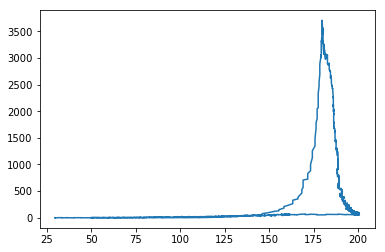

179.8


In [22]:
y = df['CONC1BGCORRECTED']
x = df['CONC1TEMP.txt']

plt.plot(x,y)
plt.show()

max_y = max(y)  # Find the maximum y value
max_x = x[y.argmax()]  # Find the x value corresponding to the maximum y value
print(max_x) #TMAX

Load Background Files in from .txt 

In [15]:
k = {os.path.basename(f): pd.read_csv(f, delim_whitespace=True, header=0) for f in glob.glob('//media/sf_Ubuntu/share/FIGAEROCALS/AM04BG/*.txt')}
background = pd.concat(k, axis=1)
background.columns = background.columns.droplevel(-1)
background = background[background['Current_Step_Type.txt']!=0]
background = background[:2780]

Background Correct

In [16]:
bgcorrected = df.sub(background,axis=0)
#print(background.describe())
#print(df.describe())


In [17]:
plt.plot(bgcorrected['m273.txt'],label='329')
plt.plot(df['m273.txt'],label='329')
plt.plot(background['m273.txt'],label='329')
plt.show()
plt.plot(bgcorrected['m273.txt'],label='467')
plt.plot(df['m273.txt'],label='467')
plt.plot(background['m273.txt'],label='467')
plt.show()
plt.plot(bgcorrected['m273.txt'], label='215')
plt.plot(df['m273.txt'], label='215')
plt.plot(background['m273.txt'], label='215')
plt.show()

KeyError: 'm273.txt'

Integrating none BG corrected data

In [18]:
#scipy.integrate.cumtrapz(df['m215.txt'], initial=0)

#vectorised version 
wrk = np.trapz(df, x=df.index, axis=0)
work_done = pd.DataFrame(wrk[None, :], columns=df.columns)


#nonvectorisedversion

work_done2 = {}
for col in df.columns:
    work_done2.update({col:np.trapz(df.loc[:, col], df.index)})
    
print(work_done)

#total = df.sum()
#print(total)

         BG.txt     CONC1.txt  CONC1TEMP.txt     CONC2.txt  CONC2TEMP.txt  \
0  497242.38141  1.155303e+07  392133.000403  3.367123e+06  391973.401234   

      CONC3.txt  CONC3TEMP.txt  CONC1BGCORRECTED  CONC2BGCORRECTED  \
0  1.219086e+06  393049.249655      1.105578e+07      2.869881e+06   

   CONC3BGCORRECTED  
0      721843.74366  


integrating BG corrected data

In [151]:
#scipy.integrate.cumtrapz(df['m215.txt'], initial=0)

#vectorised version 
wrk = np.trapz(bgcorrected, x=bgcorrected.index, axis=0)
work_done = pd.DataFrame(wrk[None, :], columns=bgcorrected.columns)


#nonvectorisedversion

work_done2 = {}
for col in bgcorrected.columns:
    work_done2.update({col:np.trapz(bgcorrected.loc[:, col], bgcorrected.index)})
    
print(work_done)

  Current_Step_Type.txt Last_Read_Heat_Zone_0.txt m215.txt m329.txt m467.txt  \
0                   NaN                       NaN      NaN      NaN      NaN   

  t_start_Buf.txt t_start_wr.txt wavs.txt  
0             NaN            NaN      NaN  
